In [1]:
# Invariance Transfer Across Transformations

from lib_dl.analysis.notebook import setup_notebook
setup_notebook("../../")
               
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display, Markdown as md

from experiments.invariance_transfer_transforms import results as res_util

In [3]:
display(md(f"experiments/{res_util.EXP_NAME}/README.md"))

# Invariance Transfer Across Transforms

We measure how invariant the representations of a model trained for one transformation are to another transformation.
We do so for each combination of transformations, i.e. we evaluate the invariance models trained on each transformation on each other transformation.
This helps us understand what inductive biases models have towards acquiring different invariances.

## Methodology

For each transformation, we create a dataset with only that transformation acting on the objects.
We use these datasets to train a model for each transformation and then evaluate its invariance (and performance) for each other transformation.

We measure representational invariance by computing the similarity resp. distance between penultimate layer representations of inputs that only differ in the transformation that is applied to them. E.g. for translation, we would measure the similarity between two representations of the same object on the same background, but translated to different positions within the image.

We use three metrics to compare representations: CKA, cosine-similarity and l2-distance.
We normalize the value that we get for cosine-similarity and l2-distance by dividing them by the average cosine-similarity resp. l2-distance of representations for random images in the test set.
So the values for cosine-similarity and l2-distance should be interpreted as "how similar (resp. different) are representation of input pairs that only differ in their transformation, relative to random pairs of images".
CKA is already normalized, so we do not apply further normalization.


## ResNet-18

,op-img,os-img,op-rand,os-rand,rp-img,rs-img,rp-rand,rs-rand,cifar10,cifar100
img_target,0.144984,0.149065,0.162371,0.165985,0.534719,0.534900,0.568122,0.568292,0.374029,0.347370
img_other,0.402124,0.394500,0.401962,0.391770,0.669634,0.669216,0.694475,0.694225,0.503175,0.490062
rand_target,0.241308,0.236289,0.289302,0.286410,0.162685,0.385617,0.116245,0.436101,0.387206,0.360522
rand_other,0.338269,0.325241,0.434004,0.420078,0.581778,0.592639,0.635222,0.684840,0.460724,0.450284
img_base,0.387177,0.416779,0.392355,0.418516,0.666423,0.663099,0.686119,0.682096,0.440448,0.447764
rand_base,0.363545,0.350342,0.447480,0.430378,0.620433,0.627609,0.645828,0.688008,0.500233,0.485391


,op-img,os-img,op-rand,os-rand,rp-img,rs-img,rp-rand,rs-rand,cifar10,cifar100
img_target,0.068597,0.067401,0.094366,0.089401,0.156114,0.158803,0.158774,0.160141,0.206644,0.178941
img_other,0.147859,0.140203,0.150259,0.141570,0.157025,0.157124,0.150237,0.150410,0.197515,0.183179
rand_target,0.103706,0.097792,0.128772,0.122492,0.105019,0.108551,0.080426,0.155474,0.223451,0.197771
rand_other,0.120194,0.112730,0.154165,0.146539,0.136993,0.148151,0.158340,0.158241,0.209254,0.195107
img_base,0.154314,0.154078,0.157851,0.157790,0.169813,0.170895,0.162501,0.163681,0.211567,0.191165
rand_base,0.131094,0.123712,0.159247,0.151496,0.156560,0.158394,0.181734,0.169918,0.201714,0.192093


& Same & $\mathbf{0.14_{\pm 0.07}}$ & $\mathbf{0.15_{\pm 0.07}}$ & $\mathbf{0.57_{\pm 0.16}}$ & $\mathbf{0.37_{\pm 0.21}}$ & $\mathbf{0.35_{\pm 0.18}}$ \\
& Other & $0.40_{\pm 0.15}$ & $0.39_{\pm 0.14}$ & $0.69_{\pm 0.15}$ & $0.50_{\pm 0.20}$ & $0.49_{\pm 0.18}$ \\
& None & $0.39_{\pm 0.15}$ & $0.42_{\pm 0.15}$ & $0.68_{\pm 0.16}$ & $0.44_{\pm 0.21}$ & $0.45_{\pm 0.19}$ \\
& Same & $\mathbf{0.12_{\pm 0.08}}$ & $\mathbf{0.44_{\pm 0.16}}$ & $\mathbf{0.24_{\pm 0.10}}$ & $\mathbf{0.39_{\pm 0.22}}$ & $\mathbf{0.36_{\pm 0.20}}$ \\
& Other & $0.64_{\pm 0.16}$ & $0.68_{\pm 0.16}$ & $0.33_{\pm 0.11}$ & $0.46_{\pm 0.21}$ & $0.45_{\pm 0.20}$ \\
& None & $0.65_{\pm 0.18}$ & $0.69_{\pm 0.17}$ & $0.35_{\pm 0.12}$ & $0.50_{\pm 0.20}$ & $0.49_{\pm 0.19}$ \\


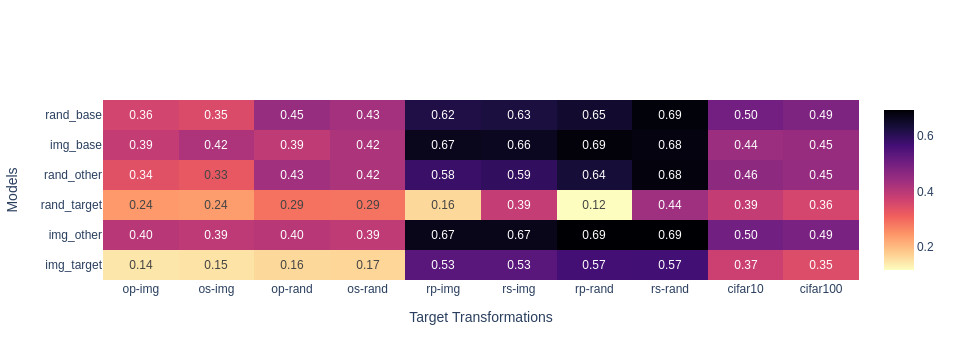

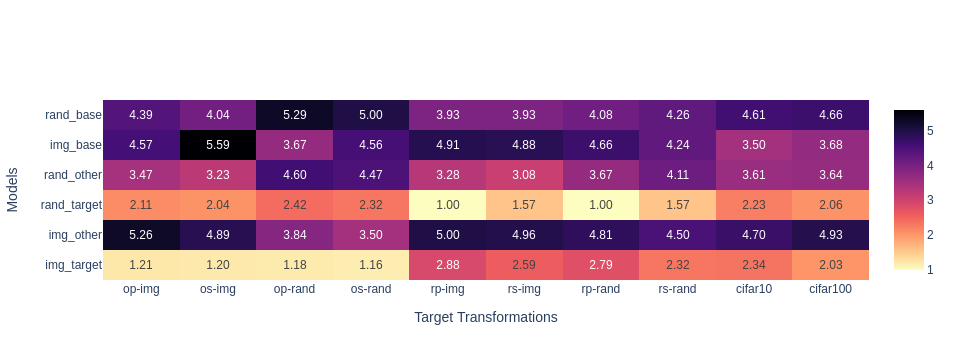

In [16]:
results = res_util.load("rn18", list(range(5)))
# res_util.show_results(
#     results,
#     show_training=True,
#     metrics=["l2"],#, "cos", "cka"],
# )
full_distances = res_util.get_full_distances(results, "l2")
full_comparisons = res_util.target_vs_non_target_comparison(full_distances)
comp_means = res_util.compute_target_vs_non_target_means(full_comparisons, "mean")
display(comp_means)
comp_stds = res_util.compute_target_vs_non_target_means(full_comparisons, "std")
display(comp_stds)
rank_means = res_util.compute_target_vs_non_target_means(
    res_util.normalize_by_rank(full_comparisons),
    "mean"
)
res_util.print_comp_table(comp_means, comp_stds, rank_means)
mean_fig = res_util.plot_distances(comp_means, reverse_colors=True, reindex=False)
display(mean_fig)
rank_fig = res_util.plot_distances(rank_means, reverse_colors=True, reindex=False)
display(rank_fig)

,op-img,os-img,op-rand,os-rand,rp-img,rs-img,rp-rand,rs-rand,cifar10,cifar100
img_target,0.121106,0.205848,0.141417,0.217722,0.534379,0.533623,0.563940,0.562616,0.372403,0.345239
img_other,0.402477,0.412621,0.403295,0.405713,0.673946,0.673774,0.694087,0.693668,0.510974,0.496037
rand_target,0.241941,0.237855,0.291682,0.287313,0.165886,0.390780,0.117380,0.441493,0.396905,0.371509
rand_other,0.335439,0.325424,0.431441,0.418926,0.587856,0.599262,0.641981,0.692965,0.464928,0.453577
img_base,0.391807,0.424866,0.397973,0.425138,0.672465,0.669033,0.688794,0.685587,0.482416,0.477244
rand_base,0.357814,0.347235,0.441723,0.427686,0.627711,0.633062,0.654984,0.695534,0.488501,0.474663


,op-img,os-img,op-rand,os-rand,rp-img,rs-img,rp-rand,rs-rand,cifar10,cifar100
img_target,0.067427,0.099836,0.089887,0.111230,0.155178,0.157895,0.161314,0.162942,0.194423,0.168556
img_other,0.147036,0.144337,0.148214,0.145958,0.156825,0.157001,0.148888,0.149125,0.196272,0.182505
rand_target,0.105346,0.102477,0.130703,0.128830,0.108940,0.108273,0.080745,0.152499,0.224922,0.203565
rand_other,0.118649,0.113863,0.153046,0.148211,0.135246,0.147585,0.155888,0.156995,0.213320,0.198543
img_base,0.154253,0.153092,0.157175,0.156781,0.168626,0.169917,0.160631,0.161575,0.221641,0.198836
rand_base,0.130304,0.125854,0.157830,0.153064,0.151458,0.158562,0.177417,0.170422,0.199562,0.189976


& Same & $\mathbf{0.12_{\pm 0.07}}$ & $\mathbf{0.21_{\pm 0.10}}$ & $\mathbf{0.56_{\pm 0.16}}$ & $\mathbf{0.37_{\pm 0.19}}$ & $\mathbf{0.35_{\pm 0.17}}$ \\
& Other & $0.40_{\pm 0.15}$ & $0.41_{\pm 0.14}$ & $0.69_{\pm 0.15}$ & $0.51_{\pm 0.20}$ & $0.50_{\pm 0.18}$ \\
& None & $0.39_{\pm 0.15}$ & $0.42_{\pm 0.15}$ & $0.69_{\pm 0.16}$ & $0.48_{\pm 0.22}$ & $0.48_{\pm 0.20}$ \\
& Same & $\mathbf{0.12_{\pm 0.08}}$ & $\mathbf{0.44_{\pm 0.15}}$ & $\mathbf{0.24_{\pm 0.10}}$ & $\mathbf{0.40_{\pm 0.22}}$ & $\mathbf{0.37_{\pm 0.20}}$ \\
& Other & $0.64_{\pm 0.16}$ & $0.69_{\pm 0.16}$ & $0.33_{\pm 0.11}$ & $0.46_{\pm 0.21}$ & $0.45_{\pm 0.20}$ \\
& None & $0.65_{\pm 0.18}$ & $0.70_{\pm 0.17}$ & $0.35_{\pm 0.13}$ & $0.49_{\pm 0.20}$ & $0.47_{\pm 0.19}$ \\


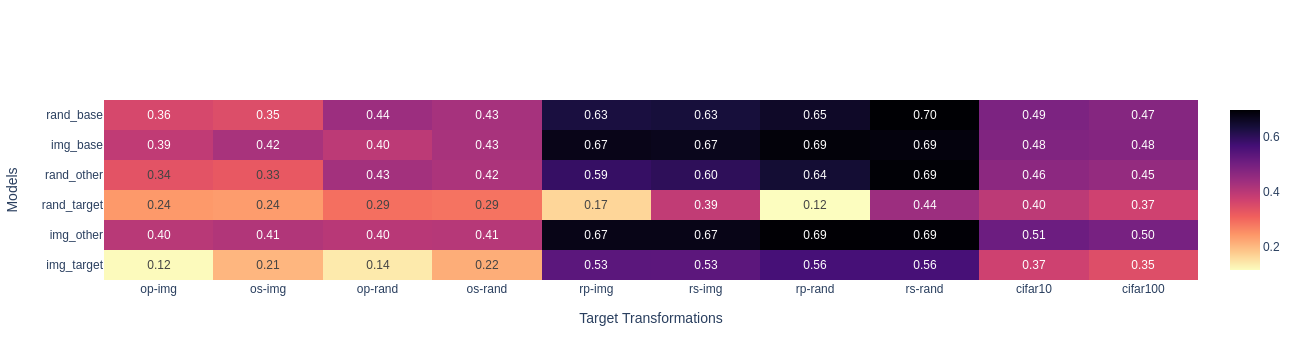

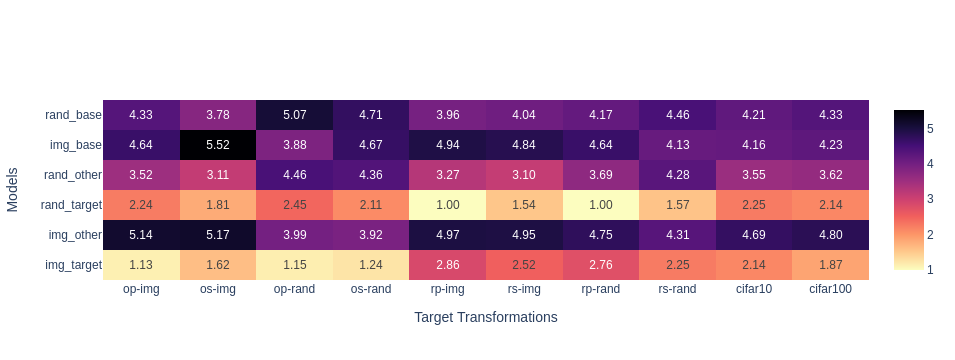

In [17]:
# With 10 seeds
results = res_util.load("rn18", list(range(10)))
# res_util.show_results(
#     results,
#     show_training=True,
#     metrics=["l2"],#, "cos", "cka"],
# )
full_distances = res_util.get_full_distances(results, "l2")
full_comparisons = res_util.target_vs_non_target_comparison(full_distances)
comp_means = res_util.compute_target_vs_non_target_means(full_comparisons, "mean")
display(comp_means)
comp_stds = res_util.compute_target_vs_non_target_means(full_comparisons, "std")
display(comp_stds)
rank_means = res_util.compute_target_vs_non_target_means(
    res_util.normalize_by_rank(full_comparisons),
    "mean"
)
res_util.print_comp_table(comp_means, comp_stds, rank_means)
mean_fig = res_util.plot_distances(comp_means, reverse_colors=True, reindex=False)
display(mean_fig)
rank_fig = res_util.plot_distances(rank_means, reverse_colors=True, reindex=False)
display(rank_fig)

## DenseNet-121

,op-img,os-img,op-rand,os-rand,rp-img,rs-img,rp-rand,rs-rand,cifar10,cifar100
img_target,0.162172,0.239168,0.198544,0.266838,0.600267,0.601887,0.664931,0.665218,0.418020,0.398051
img_other,0.392100,0.399068,0.406346,0.405256,0.673031,0.674122,0.725185,0.725697,0.495644,0.483928
rand_target,0.240727,0.238628,0.337087,0.332593,0.274985,0.363915,0.169751,0.495615,0.436222,0.417515
rand_other,0.287578,0.281866,0.422547,0.411927,0.519515,0.516633,0.655904,0.716692,0.455264,0.444417
img_base,0.391958,0.405219,0.409461,0.420293,0.688462,0.687953,0.745791,0.744764,0.497678,0.484836
rand_base,0.300065,0.295000,0.439316,0.427566,0.560213,0.553253,0.688763,0.752725,0.462903,0.455214


,op-img,os-img,op-rand,os-rand,rp-img,rs-img,rp-rand,rs-rand,cifar10,cifar100
img_target,0.087647,0.101244,0.118482,0.129872,0.145398,0.146616,0.137125,0.138394,0.196323,0.175376
img_other,0.122167,0.121789,0.128565,0.129194,0.147830,0.147815,0.141915,0.141766,0.183299,0.168380
rand_target,0.092617,0.089110,0.110680,0.106702,0.103297,0.099812,0.099898,0.117321,0.221724,0.207215
rand_other,0.104242,0.101354,0.151383,0.148005,0.124372,0.136810,0.154884,0.143793,0.218739,0.203495
img_base,0.131800,0.126339,0.140072,0.136920,0.158181,0.159877,0.151823,0.153288,0.186187,0.168997
rand_base,0.107481,0.104189,0.154081,0.149922,0.122146,0.141862,0.167005,0.144500,0.224011,0.206833


& Same & $\mathbf{0.16_{\pm 0.09}}$ & $\mathbf{0.24_{\pm 0.10}}$ & $\mathbf{0.67_{\pm 0.14}}$ & $\mathbf{0.42_{\pm 0.20}}$ & $\mathbf{0.40_{\pm 0.18}}$ \\
& Other & $0.39_{\pm 0.12}$ & $0.40_{\pm 0.12}$ & $0.73_{\pm 0.14}$ & $0.50_{\pm 0.18}$ & $0.48_{\pm 0.17}$ \\
& None & $0.39_{\pm 0.13}$ & $0.41_{\pm 0.13}$ & $0.74_{\pm 0.15}$ & $0.50_{\pm 0.19}$ & $0.48_{\pm 0.17}$ \\
& Same & $\mathbf{0.17_{\pm 0.10}}$ & $\mathbf{0.50_{\pm 0.12}}$ & $\mathbf{0.24_{\pm 0.09}}$ & $\mathbf{0.44_{\pm 0.22}}$ & $\mathbf{0.42_{\pm 0.21}}$ \\
& Other & $0.66_{\pm 0.15}$ & $0.72_{\pm 0.14}$ & $0.28_{\pm 0.10}$ & $0.46_{\pm 0.22}$ & $0.44_{\pm 0.20}$ \\
& None & $0.69_{\pm 0.17}$ & $0.75_{\pm 0.14}$ & $0.30_{\pm 0.10}$ & $0.46_{\pm 0.22}$ & $0.46_{\pm 0.21}$ \\


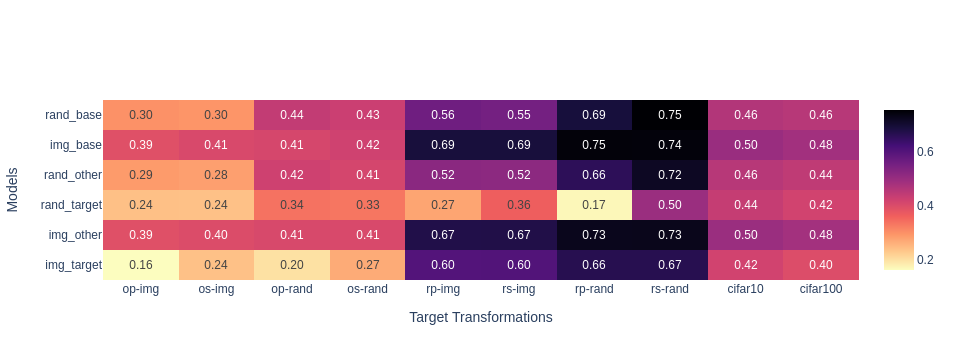

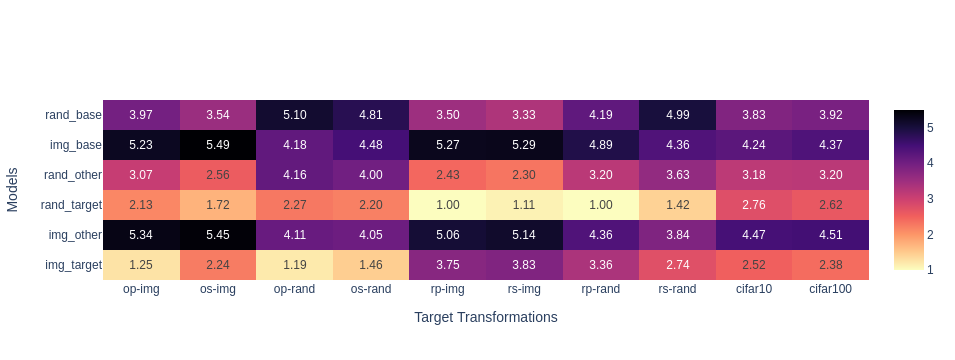

In [18]:
results = res_util.load("dn121", list(range(10)))
# res_util.show_results(
#     results,
#     show_training=True,
#     metrics=["l2"],#, "cos", "cka"],
# )
full_distances = res_util.get_full_distances(results, "l2")
full_comparisons = res_util.target_vs_non_target_comparison(full_distances)
comp_means = res_util.compute_target_vs_non_target_means(full_comparisons, "mean")
display(comp_means)
comp_stds = res_util.compute_target_vs_non_target_means(full_comparisons, "std")
display(comp_stds)
rank_means = res_util.compute_target_vs_non_target_means(
    res_util.normalize_by_rank(full_comparisons),
    "mean"
)
res_util.print_comp_table(comp_means, comp_stds, rank_means)
mean_fig = res_util.plot_distances(comp_means, reverse_colors=True, reindex=False)
display(mean_fig)
rank_fig = res_util.plot_distances(rank_means, reverse_colors=True, reindex=False)
display(rank_fig)

## VGG-11

,op-img,os-img,op-rand,os-rand,rp-img,rs-img,rp-rand,rs-rand,cifar10,cifar100
img_target,0.118731,0.185936,0.168121,0.207560,0.576172,0.575925,0.662276,0.661249,0.343667,0.329695
img_other,0.386925,0.394311,0.395145,0.394011,0.690070,0.689831,0.747507,0.746814,0.503292,0.490126
rand_target,0.201935,0.198215,0.229937,0.222937,0.227995,0.339121,0.122149,0.410414,0.325642,0.302658
rand_other,0.297860,0.292140,0.393395,0.380645,0.555704,0.557157,0.643509,0.707946,0.444677,0.429124
img_base,0.376168,0.393889,0.387125,0.394529,0.711636,0.709467,0.783968,0.780908,0.508457,0.491861
rand_base,0.268934,0.263140,0.353711,0.336386,0.556623,0.551693,0.650918,0.730872,0.414338,0.396961


,op-img,os-img,op-rand,os-rand,rp-img,rs-img,rp-rand,rs-rand,cifar10,cifar100
img_target,0.064447,0.092030,0.106062,0.121741,0.145556,0.144898,0.161484,0.161591,0.171847,0.163532
img_other,0.122109,0.122172,0.145051,0.144942,0.161715,0.162590,0.152059,0.152452,0.169340,0.163353
rand_target,0.122546,0.118658,0.140750,0.136867,0.130661,0.154194,0.082656,0.165428,0.196715,0.188049
rand_other,0.116523,0.112711,0.150701,0.145525,0.116167,0.144470,0.129265,0.137928,0.164933,0.162260
img_base,0.119655,0.123775,0.141218,0.148175,0.175669,0.175943,0.159867,0.159938,0.178037,0.166496
rand_base,0.129926,0.126397,0.163020,0.156843,0.114597,0.178905,0.125361,0.147352,0.187016,0.179450


& Same & $\mathbf{0.12_{\pm 0.06}}$ & $\mathbf{0.19_{\pm 0.09}}$ & $\mathbf{0.66_{\pm 0.16}}$ & $\mathbf{0.34_{\pm 0.17}}$ & $\mathbf{0.33_{\pm 0.16}}$ \\
& Other & $0.39_{\pm 0.12}$ & $0.39_{\pm 0.12}$ & $0.75_{\pm 0.15}$ & $0.50_{\pm 0.17}$ & $0.49_{\pm 0.16}$ \\
& None & $0.38_{\pm 0.12}$ & $0.39_{\pm 0.12}$ & $0.78_{\pm 0.16}$ & $0.51_{\pm 0.18}$ & $0.49_{\pm 0.17}$ \\
& Same & $\mathbf{0.12_{\pm 0.08}}$ & $\mathbf{0.41_{\pm 0.17}}$ & $\mathbf{0.20_{\pm 0.12}}$ & $\mathbf{0.33_{\pm 0.20}}$ & $\mathbf{0.30_{\pm 0.19}}$ \\
& Other & $0.64_{\pm 0.13}$ & $0.71_{\pm 0.14}$ & $0.29_{\pm 0.11}$ & $0.44_{\pm 0.16}$ & $0.43_{\pm 0.16}$ \\
& None & $0.65_{\pm 0.13}$ & $0.73_{\pm 0.15}$ & $0.26_{\pm 0.13}$ & $0.41_{\pm 0.19}$ & $0.40_{\pm 0.18}$ \\


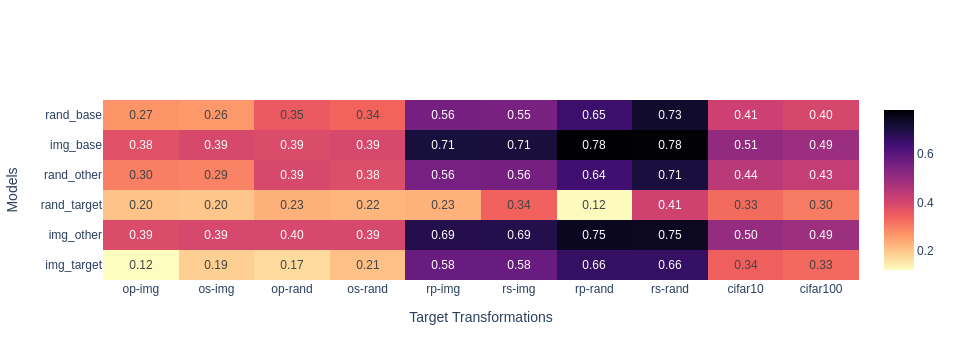

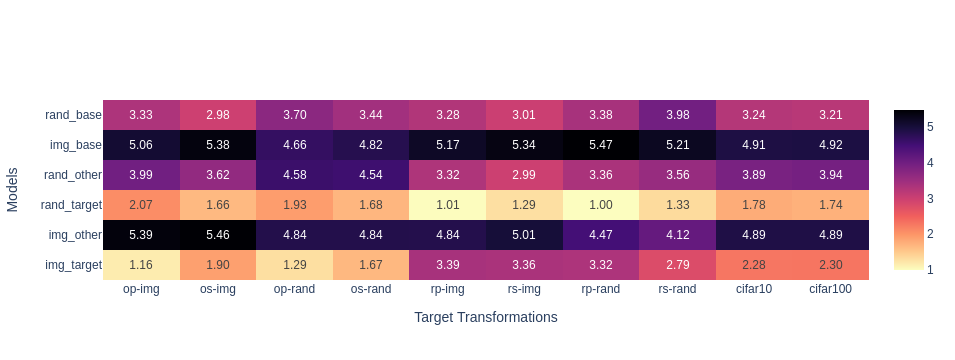

In [19]:
results = res_util.load("vgg11", list(range(10)))
# res_util.show_results(
#     results,
#     show_training=True,
#     metrics=["l2"],#, "cos", "cka"],
# )
full_distances = res_util.get_full_distances(results, "l2")
full_comparisons = res_util.target_vs_non_target_comparison(full_distances)
comp_means = res_util.compute_target_vs_non_target_means(full_comparisons, "mean")
display(comp_means)
comp_stds = res_util.compute_target_vs_non_target_means(full_comparisons, "std")
display(comp_stds)
rank_means = res_util.compute_target_vs_non_target_means(
    res_util.normalize_by_rank(full_comparisons),
    "mean"
)
res_util.print_comp_table(comp_means, comp_stds, rank_means)
mean_fig = res_util.plot_distances(comp_means, reverse_colors=True, reindex=False)
display(mean_fig)
rank_fig = res_util.plot_distances(rank_means, reverse_colors=True, reindex=False)
display(rank_fig)

## ViT

,op-img,os-img,op-rand,os-rand,rp-img,rs-img,rp-rand,rs-rand,cifar10,cifar100
img_target,0.219291,0.259058,0.230119,0.271352,0.498256,0.499794,0.514589,0.516202,0.357539,0.332822
img_other,0.414770,0.412436,0.420837,0.420387,0.624955,0.625291,0.634609,0.635064,0.476568,0.462679
rand_target,0.239611,0.233184,0.265875,0.255429,0.276109,0.366951,0.282755,0.428265,0.312220,0.301274
rand_other,0.349305,0.341128,0.403462,0.391944,0.528691,0.543738,0.607577,0.637345,0.445470,0.434144
img_base,0.433843,0.416798,0.438323,0.425999,0.640584,0.641717,0.648687,0.650647,0.483552,0.468431
rand_base,0.358608,0.343573,0.411448,0.395439,0.564386,0.581044,0.632287,0.666448,0.461864,0.451013


,op-img,os-img,op-rand,os-rand,rp-img,rs-img,rp-rand,rs-rand,cifar10,cifar100
img_target,0.089506,0.106008,0.096927,0.115201,0.175872,0.175315,0.184445,0.183400,0.141660,0.130824
img_other,0.169332,0.161654,0.172796,0.165726,0.185394,0.185551,0.187518,0.187753,0.174987,0.171408
rand_target,0.116863,0.114903,0.122379,0.120257,0.100455,0.111765,0.134203,0.146284,0.141185,0.142985
rand_other,0.141777,0.136889,0.161794,0.156124,0.173546,0.167577,0.195253,0.185485,0.177102,0.176267
img_base,0.189901,0.173933,0.193868,0.178281,0.192532,0.192721,0.195080,0.194390,0.184968,0.179703
rand_base,0.160729,0.154157,0.172968,0.165779,0.178927,0.172240,0.204335,0.186700,0.192766,0.188131


& Same & $\mathbf{0.22_{\pm 0.09}}$ & $\mathbf{0.26_{\pm 0.11}}$ & $\mathbf{0.52_{\pm 0.18}}$ & $\mathbf{0.36_{\pm 0.14}}$ & $\mathbf{0.33_{\pm 0.13}}$ \\
& Other & $0.41_{\pm 0.17}$ & $0.41_{\pm 0.16}$ & $0.64_{\pm 0.19}$ & $0.48_{\pm 0.17}$ & $0.46_{\pm 0.17}$ \\
& None & $0.43_{\pm 0.19}$ & $0.42_{\pm 0.17}$ & $0.65_{\pm 0.19}$ & $0.48_{\pm 0.18}$ & $0.47_{\pm 0.18}$ \\
& Same & $\mathbf{0.28_{\pm 0.13}}$ & $\mathbf{0.43_{\pm 0.15}}$ & $\mathbf{0.23_{\pm 0.11}}$ & $\mathbf{0.31_{\pm 0.14}}$ & $\mathbf{0.30_{\pm 0.14}}$ \\
& Other & $0.61_{\pm 0.20}$ & $0.64_{\pm 0.19}$ & $0.34_{\pm 0.14}$ & $0.45_{\pm 0.18}$ & $0.43_{\pm 0.18}$ \\
& None & $0.63_{\pm 0.20}$ & $0.67_{\pm 0.19}$ & $0.34_{\pm 0.15}$ & $0.46_{\pm 0.19}$ & $0.45_{\pm 0.19}$ \\


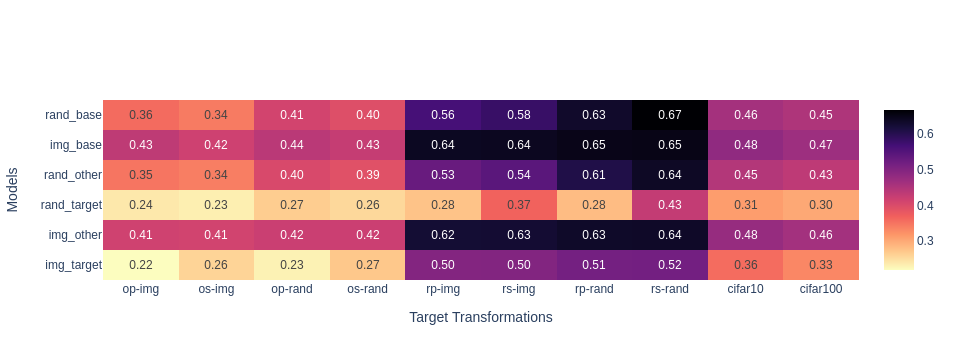

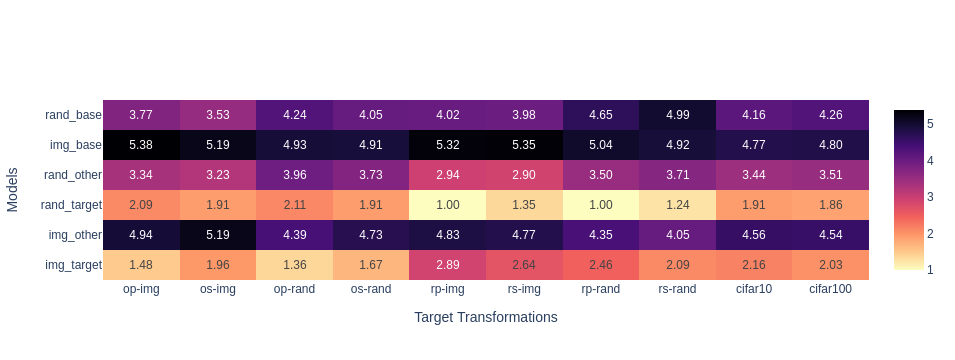

In [21]:
results = res_util.load("vit", list(range(10)))
# res_util.show_results(
#     results,
#     show_training=True,
#     metrics=["l2"],#, "cos", "cka"],
# )
full_distances = res_util.get_full_distances(results, "l2")
full_comparisons = res_util.target_vs_non_target_comparison(full_distances)
comp_means = res_util.compute_target_vs_non_target_means(full_comparisons, "mean")
display(comp_means)
comp_stds = res_util.compute_target_vs_non_target_means(full_comparisons, "std")
display(comp_stds)
rank_means = res_util.compute_target_vs_non_target_means(
    res_util.normalize_by_rank(full_comparisons),
    "mean"
)
res_util.print_comp_table(comp_means, comp_stds, rank_means)
mean_fig = res_util.plot_distances(comp_means, reverse_colors=True, reindex=False)
display(mean_fig)
rank_fig = res_util.plot_distances(rank_means, reverse_colors=True, reindex=False)
display(rank_fig)

In [ ]:
# Upload to the server
res_util.publish("eval")